**Data Visualization about Interstate Traffic**

* Nama : Hanif Naufal Rafandi
* Kelas : Data Analyst

# **Import Library & Load Data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import libray dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

traffic = pd.read_csv('/content/drive/MyDrive/File EDA Data Analyst/File CSV/Metro_Interstate_Traffic_Volume.csv')
traffic.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,Unnamed: 9
0,5545,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2/10/2012,NaN
1,4516,None,289.36,0.0,0.0,75,Clouds,broken clouds,2/10/2012,NaN
2,4767,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2/10/2012,NaN
3,5026,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2/10/2012,NaN
4,4918,None,291.14,0.0,0.0,75,Clouds,broken clouds,2/10/2012,NaN


# **Memisahkan Date_time Menjadi Month & Years**

In [3]:
# Datetime Extraction:
traffic['date_time']=pd.to_datetime(traffic['date_time'])
traffic['day'] = traffic['date_time'].dt.day_name()
traffic['month'] = traffic['date_time'].dt.month
traffic['year'] = traffic['date_time'].dt.year
traffic['hour'] = traffic['date_time'].dt.hour
traffic.drop('date_time',axis=1,inplace = True)
traffic.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,Unnamed: 9,day,month,year,hour
0,5545,None,288.28,0.0,0.0,40,Clouds,scattered clouds,NaN,Friday,2,2012,0
1,4516,None,289.36,0.0,0.0,75,Clouds,broken clouds,NaN,Friday,2,2012,0
2,4767,None,289.58,0.0,0.0,90,Clouds,overcast clouds,NaN,Friday,2,2012,0
3,5026,None,290.13,0.0,0.0,90,Clouds,overcast clouds,NaN,Friday,2,2012,0
4,4918,None,291.14,0.0,0.0,75,Clouds,broken clouds,NaN,Friday,2,2012,0


# **Menampilkan Informasi & Deskripsi Dataset**

In [4]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       48204 non-null  int64  
 1   holiday              48204 non-null  object 
 2   temp                 48204 non-null  float64
 3   rain_1h              48204 non-null  float64
 4   snow_1h              48204 non-null  float64
 5   clouds_all           48204 non-null  int64  
 6   weather_main         48204 non-null  object 
 7   weather_description  48204 non-null  object 
 8   Unnamed: 9           0 non-null      float64
 9   day                  48204 non-null  object 
 10  month                48204 non-null  int64  
 11  year                 48204 non-null  int64  
 12  hour                 48204 non-null  int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 4.8+ MB


In [5]:
traffic.describe()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,Unnamed: 9,month,year,hour
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,0.0,48204.000000,48204.000000,48204.000000
mean,3259.818355,281.205870,0.334264,0.000222,49.362231,NaN,6.537715,2015.512426,6.899220
std,1986.860670,13.338232,44.789133,0.008168,39.015750,NaN,3.413871,1.893211,7.749866
min,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,2012.000000,0.000000
25%,1193.000000,272.160000,0.000000,0.000000,1.000000,NaN,4.000000,2014.000000,0.000000
50%,3380.000000,282.450000,0.000000,0.000000,64.000000,NaN,7.000000,2016.000000,4.000000
75%,4933.000000,291.806000,0.000000,0.000000,90.000000,NaN,9.000000,2017.000000,13.000000
max,7280.000000,310.070000,9831.300000,0.510000,100.000000,NaN,12.000000,2018.000000,23.000000


In [6]:
traffic.shape

(48204, 13)

# **Mengecek data null dan duplikat**

In [7]:
traffic.isnull().sum()

traffic_volume             0
holiday                    0
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
Unnamed: 9             48204
day                        0
month                      0
year                       0
hour                       0
dtype: int64

In [8]:
print(f"Cek Data Duplikat : {traffic.duplicated().sum()}")
traffic.drop_duplicates()
print(f"{traffic.duplicated().sum()} are drop from dataset.")

Cek Data Duplikat : 17
17 are drop from dataset.


# **Klasifikasi Distribusi dari Volume Traffic**

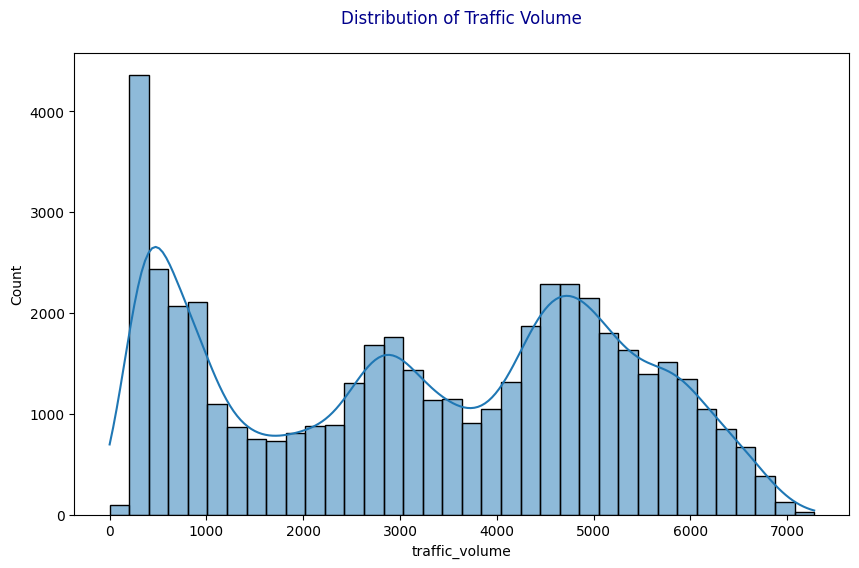

In [9]:
# Histogram of traffic volume
plt.figure(figsize=(10,6))
sns.histplot(traffic['traffic_volume'], kde=True)
plt.title('Distribution of Traffic Volume\n', color="darkblue")
plt.show()

# **Klasifikasi Traffic berdasarkan Kondisi Cuaca**

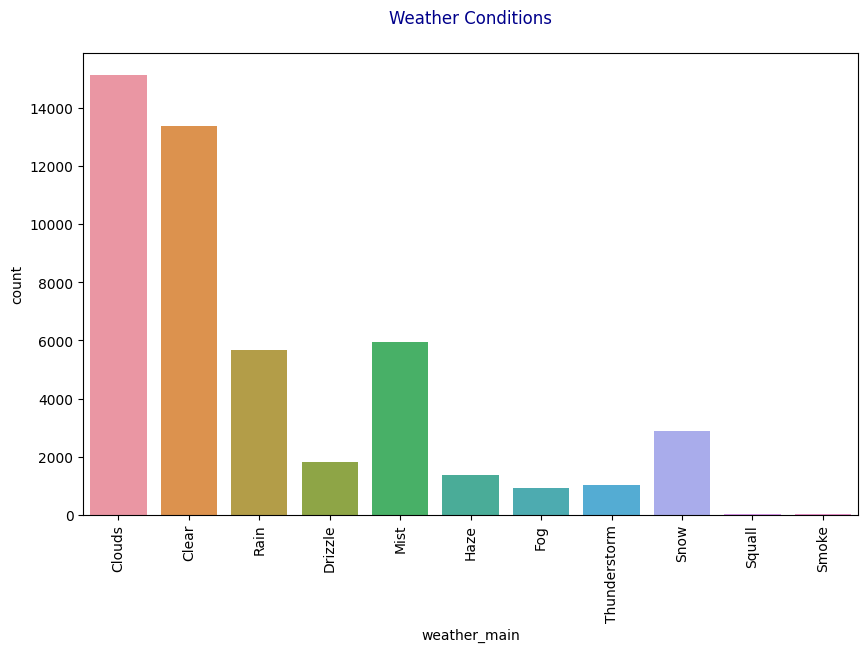

In [10]:
# Bar plot of weather_main
plt.figure(figsize=(10,6))
sns.countplot(x='weather_main', data=traffic)
plt.title('Weather Conditions\n', color='darkblue')
plt.xticks(rotation=90)
plt.show()

# **Klasifikasi Traffic berdasarkan Snowfall**

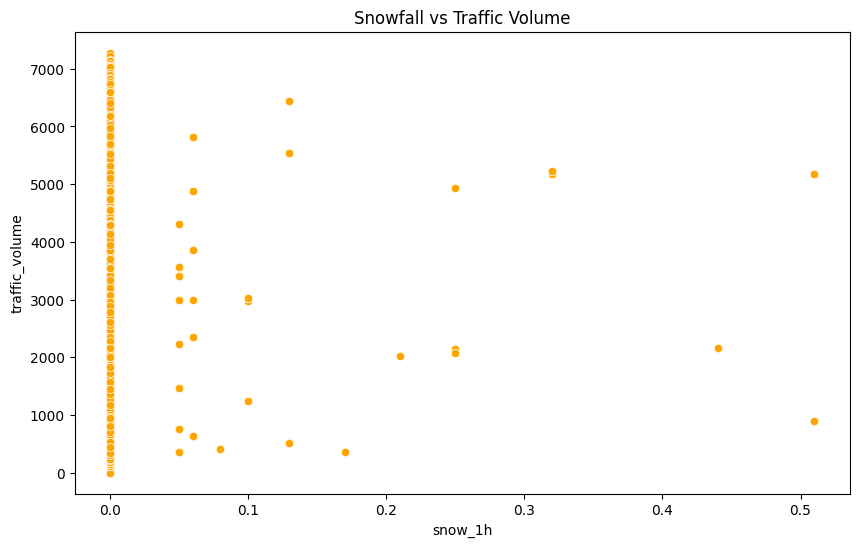

In [11]:
# Plotting the relationship between snow_1h and traffic_volume
plt.figure(figsize=(10,6))
sns.scatterplot(x='snow_1h', y='traffic_volume', data=traffic, color='orange')
plt.title('Snowfall vs Traffic Volume')
plt.show()

# **Klasifikasi Traffic berdasarkan Cloud Coverage**

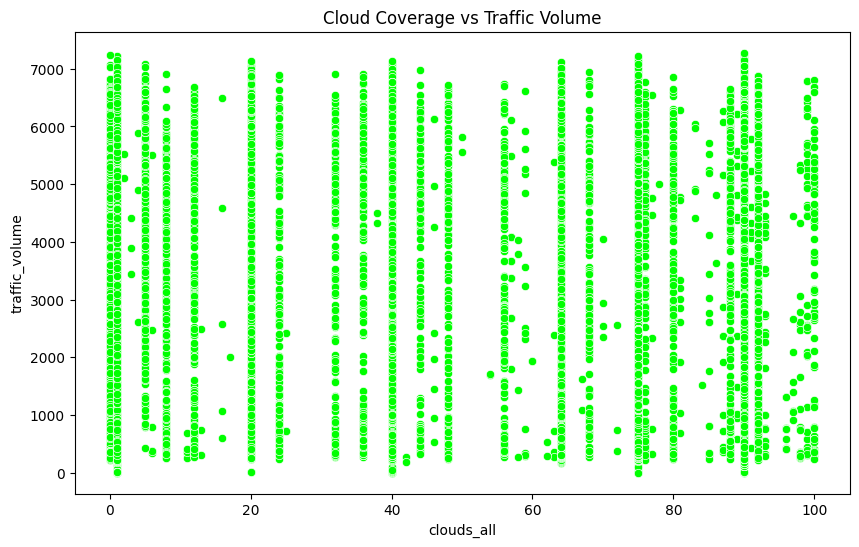

In [12]:
# Plotting the relationship between clouds_all and traffic_volume
plt.figure(figsize=(10,6))
sns.scatterplot(x='clouds_all', y='traffic_volume', data=traffic, color='lime')
plt.title('Cloud Coverage vs Traffic Volume')
plt.show()

# **Menghitung Data yang Hilang berdasarkan Years & Hours**

In [13]:
# counting the amount of hours of missing data for each distinct year
missing_h_dist = traffic.groupby('year')['hour'].count()
missing_h_dist

year
2012     2559
2013     8573
2014     4839
2015     4373
2016     9306
2017    10605
2018     7949
Name: hour, dtype: int64

<Axes: title={'center': 'Hours of Missing Data by Year'}, xlabel='Year', ylabel='Hours Missing'>

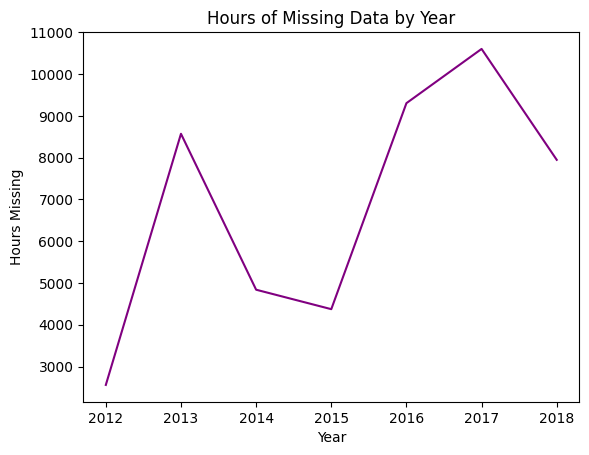

In [14]:
# visualizing the results
missing_h_dist.plot(column = 'hour',
                  title = 'Hours of Missing Data by Year',
                  xlabel = 'Year',
                  ylabel = 'Hours Missing',
                  color = 'Purple')